### Importing all the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
%matplotlib inline

### Loading dataset

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.shape

(400, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


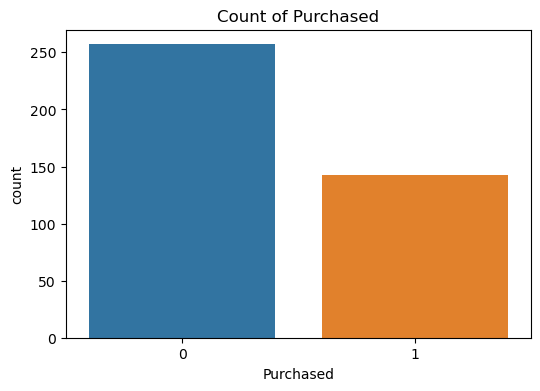

In [7]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Purchased', data=data)
plt.title("Count of Purchased")
plt.show()

In [8]:
n=len(data)
purchased_0=len(data[data['Purchased']==0])
purchased_1=len(data[data['Purchased']==1])

print("% of people puchased Ads in social network dataset: ",purchased_1*100/n)
print("% of people not puchased Ads in social network dataset: ",purchased_0*100/n)

% of people puchased Ads in social network dataset:  35.75
% of people not puchased Ads in social network dataset:  64.25


### peoples are not Purchased has edge over ads in social network.

In [9]:
corr_df=data  
#New dataframe to calculate correlation between numeric features
cor= corr_df.corr()
print(cor)

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


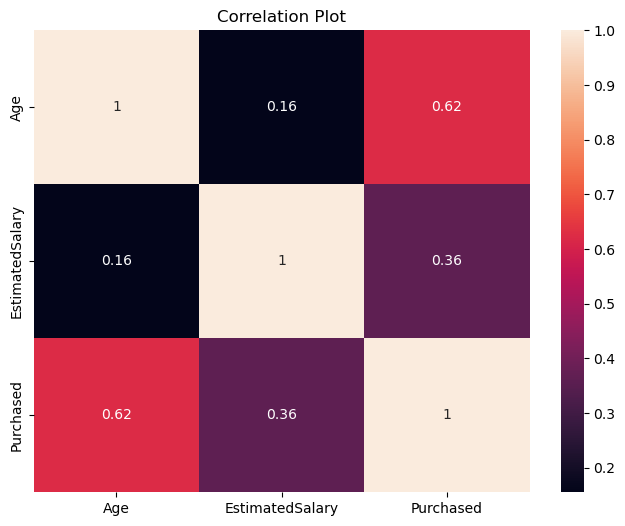

In [10]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

#### The strongest correlation is between Age and Purchased features (0.62).

In [11]:
print(data.isna().sum())

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [12]:
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [13]:
X=data.iloc[:,:2]
Y=data['Purchased']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
rfc=RandomForestClassifier(random_state=42)

In [16]:
param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [17]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]})

In [18]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [19]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=5, random_state=42)

In [20]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=5, criterion='entropy')

In [21]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300,
                       random_state=42)

In [22]:
pred=rfc1.predict(x_test)

In [23]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.95


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        73
           1       0.90      0.98      0.94        47

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.95      0.95      0.95       120



[[68  5]
 [ 1 46]]
